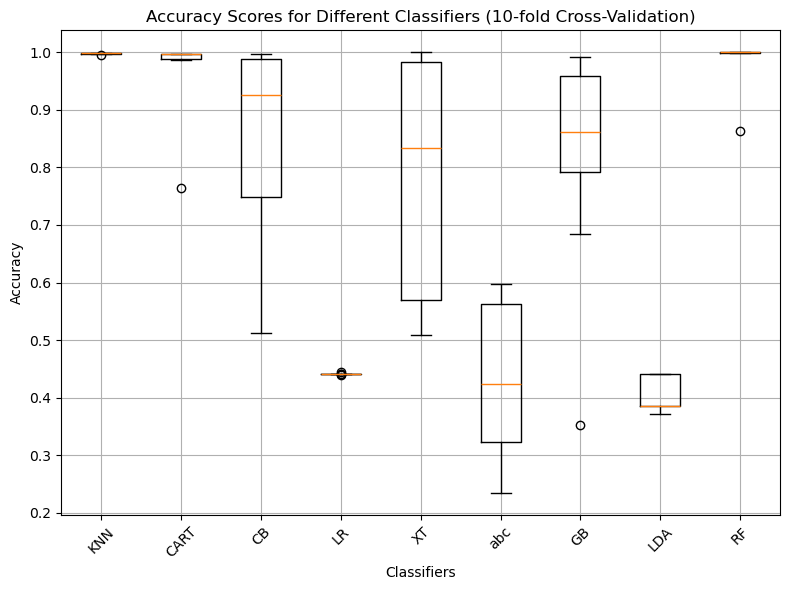

In [1]:
# loaded model for RF Dataverse
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings('ignore')

# Read in data as pandas dataframe and display first 5 rows
dataset = pd.read_csv('/Users/samson/Documents/Final2/swell/swell_all.csv')

label_mapping = {"no stress": 0, "time pressure": 1, "interruption": 2}
dataset['condition'] = dataset['condition'].replace(label_mapping)

#subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT','HF']
subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT']

y = dataset['condition'].copy()
X = dataset[subCol]

def preprocess_inputs(df):
    df = df.copy()
    
    df['condition'] = df['condition'].replace(label_mapping)
    
    y = df['condition'].copy()
    X = df[subCol]
    #X = df.drop('condition', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_inputs(dataset)

# Define the directory containing the dumped files
directory = '/Users/samson/Documents/Final2/swell/results2'  # Update this to your directory

# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier
test_scores = {clf_name: result['cv_results']['mean_test_score'] for clf_name, result in results.items()}

# Create a boxplot for accuracy scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(test_scores.values())
plt.xticks(range(1, len(test_scores) + 1), test_scores.keys(), rotation=45)
plt.title('Accuracy Scores for Different Classifiers (10-fold Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()


Classifier: KNN
Fold 1: Mean accuracy: 0.9984
Fold 2: Mean accuracy: 0.9985
Fold 3: Mean accuracy: 0.9984
Fold 4: Mean accuracy: 0.9987
Fold 5: Mean accuracy: 0.9985
Fold 6: Mean accuracy: 0.9986
Fold 7: Mean accuracy: 0.9983
Fold 8: Mean accuracy: 0.9986
Fold 9: Mean accuracy: 0.9986
Fold 10: Mean accuracy: 0.9986
Overall Mean Accuracy: 0.9985

Classifier: CART
Fold 1: Mean accuracy: 0.9718
Fold 2: Mean accuracy: 0.9714
Fold 3: Mean accuracy: 0.9711
Fold 4: Mean accuracy: 0.9707
Fold 5: Mean accuracy: 0.9722
Fold 6: Mean accuracy: 0.9714
Fold 7: Mean accuracy: 0.9710
Fold 8: Mean accuracy: 0.9712
Fold 9: Mean accuracy: 0.9719
Fold 10: Mean accuracy: 0.9715
Overall Mean Accuracy: 0.9714

Classifier: CB
Fold 1: Mean accuracy: 0.8524
Fold 2: Mean accuracy: 0.8533
Fold 3: Mean accuracy: 0.8510
Fold 4: Mean accuracy: 0.8503
Fold 5: Mean accuracy: 0.8521
Fold 6: Mean accuracy: 0.8541
Fold 7: Mean accuracy: 0.8520
Fold 8: Mean accuracy: 0.8514
Fold 9: Mean accuracy: 0.8511
Fold 10: Mean accu

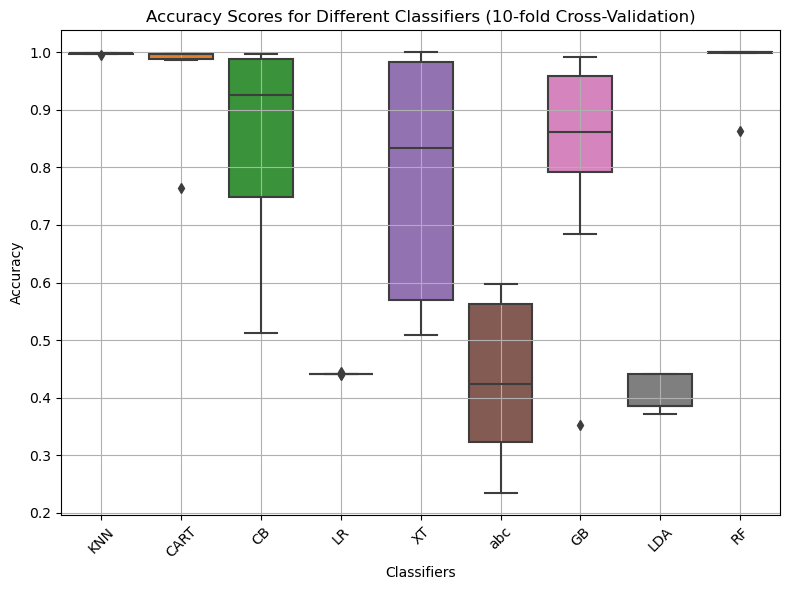

In [2]:
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")

    # Extract the cross-validation results
    cv_results = result['cv_results']

    # Number of folds - this assumes that each 'split{i}_test_score' is present in the results
    n_folds = len([key for key in cv_results.keys() if key.startswith('split') and key.endswith('test_score')])

    # Print the accuracy for each fold
    for fold_idx in range(n_folds):
        fold_key = f'split{fold_idx}_test_score'
        scores = cv_results[fold_key]
        print(f"Fold {fold_idx + 1}: Mean accuracy: {scores.mean():.4f}")

    # Calculate and print the overall mean accuracy across all folds
    mean_accuracy = sum(cv_results[f'split{i}_test_score'].mean() for i in range(n_folds)) / n_folds
    print(f"Overall Mean Accuracy: {mean_accuracy:.4f}\n")


import pandas as pd
df = pd.DataFrame.from_dict(test_scores, orient='index').transpose()

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Accuracy Scores for Different Classifiers (10-fold Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()


Best Classifier: KNN
Best Mean Accuracy: 0.9985153894056484
['0' '0' '0' ... '2' '2' '2']
Hyperparameters of the Best Classifier (KNN):
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


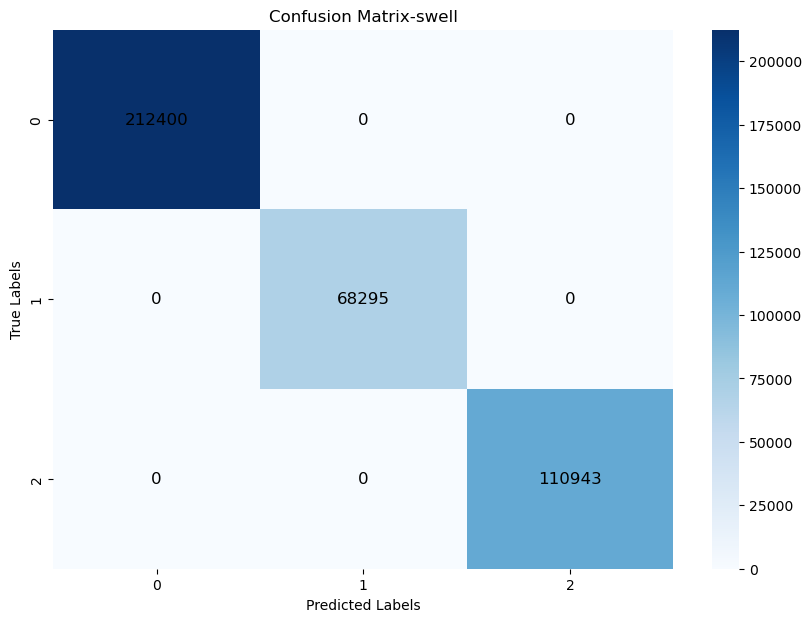

In [7]:
import os
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings('ignore')

# dataset = pd.read_csv('/Users/samson/Documents/Final2/swell/swell_all.csv')
dataset = pd.read_csv('/Users/samson/Documents/Final2/swell/swell_all.csv')

#swell
label_mapping = {"no stress": 0, "time pressure": 1, "interruption": 2}
dataset['condition'] = dataset['condition'].replace(label_mapping)

#subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT','HF']
subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT']

y = dataset['condition'].copy()
X = dataset[subCol]

# Define the directory containing the dumped files
directory = '/Users/samson/Documents/Final2/swell/results2'  # Update this to your directory

# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier and find the best one
best_score = 0
best_clf_name = None
for clf_name, result in results.items():
    # Calculate the average test score for the current classifier
    mean_test_score = result['cv_results']['mean_test_score'].mean()
    if mean_test_score > best_score:
        best_score = mean_test_score
        best_clf_name = clf_name

# Load the best estimator model for the best classifier
best_estimator = results[best_clf_name]['best_estimator']

# # Assuming it's a classifier, class probabilities for each sample
# class_probabilities = best_estimator.predict_proba(X)
# print (class_probabilities)

# # Assuming it's a classifier, class probabilities for each sample
# class_probabilities = best_estimator.predict_proba(X)
# print (class_probabilities)

# Make predictions using the best model on your data
predictions = best_estimator.predict(X)
predictions = predictions.astype(str)

# # Ensure y_test is of the same type as predictions
y = y.astype(predictions.dtype)


print(f"Best Classifier: {best_clf_name}")
print(f"Best Mean Accuracy: {best_score}")
print(predictions)

# Print the hyperparameters of the best classifier
print(f"Hyperparameters of the Best Classifier ({best_clf_name}):")
print(best_estimator.get_params())

# Print each prediction value on a separate line for all 
# for i, pred in enumerate(predictions):
#     print(f"Sample {i}: Prediction - {pred}")

# Making the Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)

# Plotting the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues')  # Turn off automatic annotation

# Manually add text annotations with better control.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], 
                fontsize=12,  # you can change this size to fit your needs
                ha='center', va='center')

plt.title('Confusion Matrix-swell')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()